In [1]:
%%html
<style>
  table {align:left;display:block}
</style>

# Overview
 - Many thanks to [Misty N.](https://www.kaggle.com/mistyn), with his amazing [Notebook](https://www.kaggle.com/mistyn/qa-tf2-eda-of-input-and-training-set-response-data). <br>
 - This Notebook summarizes & quotes a lot of his [Notebook](https://www.kaggle.com/mistyn/qa-tf2-eda-of-input-and-training-set-response-data), giving some additional data visualization.
 

In [2]:
import numpy as np
import pandas as pd
import os, gc, json, pickle
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter

In [3]:
PATH = '../input'
os.listdir(PATH)

['sample_submission.csv',
 'simplified-nq-train.jsonl',
 'simplified-nq-test.jsonl']

# 1. Load Datasets

## File Description
 - simplified-nq-train.jsonl - the training data, in newline-delimited JSON format.
 - simplified-nq-kaggle-test.jsonl - the test data, in newline-delimited JSON format.
 - sample_submission.csv - a sample submission file in the correct format

## Data fields
 - document_text - the text of the article in question (with some HTML tags to provide document structure). The text can be tokenized by splitting on whitespace.
 - question_text - the question to be answered
 - long_answer_candidates - a JSON array containing all of the plausible long answers.
 - annotations - a JSON array containing all of the correct long + short answers. Only provided for train.
 - document_url - the URL for the full article. Provided for informational purposes only. This is NOT the simplified version of the article so indices from this cannot be used directly. The content may also no longer match the html used to generate document_text. Only provided for train.
 - example_id - unique ID for the sample.

In [4]:
def read_data(path, sample = True, chunksize = 30000):
    if sample == True:
        df = []
        with open(path, 'rt') as reader:
            for i in range(chunksize):
                df.append(json.loads(reader.readline()))
        df = pd.DataFrame(df)
    else:
        df = pd.read_json(path, orient = 'records', lines = True)
        gc.collect()
    return df

In [5]:
%%time
################
# train data
################
train = read_data(PATH+'/simplified-nq-train.jsonl', sample = True, chunksize=100_000)
print("train shape", train.shape)
display(train.head(5))

train shape (100000, 6)


annotations  \
0  [{'yes_no_answer': 'NONE', 'long_answer': {'st...   
1  [{'yes_no_answer': 'NONE', 'long_answer': {'st...   
2  [{'yes_no_answer': 'NONE', 'long_answer': {'st...   
3  [{'yes_no_answer': 'NONE', 'long_answer': {'st...   
4  [{'yes_no_answer': 'NONE', 'long_answer': {'st...   

                                       document_text  \
0  Email marketing - Wikipedia <H1> Email marketi...   
1  The Mother ( How I Met Your Mother ) - wikiped...   
2  Human fertilization - wikipedia <H1> Human fer...   
3  List of National Football League career quarte...   
4  Roanoke Colony - wikipedia <H1> Roanoke Colony...   

                                        document_url           example_id  \
0  https://en.wikipedia.org//w/index.php?title=Em...  5655493461695504401   
1  https://en.wikipedia.org//w/index.php?title=Th...  5328212470870865242   
2  https://en.wikipedia.org//w/index.php?title=Hu...  4435104480114867852   
3  https://en.wikipedia.org//w/index.php?title=Li...  5289242154789678439   
4  https://en.wikipedia.org//w/index.php?title=Ro...  5489863933082811018   

                              long_answer_candidates  \
0  [{'start_token': 14, 'top_level': True, 'end_t...   
1  [{'start_token': 28, 'top_level': True, 'end_t...   
2  [{'start_token': 14, 'top_level': True, 'end_t...   
3  [{'start_token': 28, 'top_level': True, 'end_t...   
4  [{'start_token': 32, 'top_level': True, 'end_t...   

                                       question_text  
0  which is the most common use of opt-in e-mail ...  
1            how i.met your mother who is the mother  
2   what type of fertilisation takes place in humans  
3                   who had the most wins in the nfl  
4    what happened to the lost settlement of roanoke

CPU times: user 27.8 s, sys: 7.4 s, total: 35.2 s
Wall time: 9min 14s


In [6]:
%%time
################
# test data
################
test = read_data(PATH+'/simplified-nq-test.jsonl', sample = False)
print("test shape", test.shape)
display(test.head(5))

test shape (346, 4)


document_text           example_id  \
0  High Commission of South Africa , London - wik... -1220107454853145600   
1  Michael 's Last Dundies - wikipedia <H1> Micha...  8777415633185303552   
2  Cross of gold speech - wikipedia <H1> Cross of...  4640548859154538496   
3  Wilkie Bard - wikipedia <H1> Wilkie Bard </H1>... -5316095317154496512   
4  Ice Age : Collision Course - Wikipedia <H1> Ic... -8752372642178983936   

                              long_answer_candidates  \
0  [{'end_token': 136, 'start_token': 18, 'top_le...   
1  [{'end_token': 190, 'start_token': 23, 'top_le...   
2  [{'end_token': 165, 'start_token': 12, 'top_le...   
3  [{'end_token': 105, 'start_token': 8, 'top_lev...   
4  [{'end_token': 287, 'start_token': 16, 'top_le...   

                                       question_text  
0  who is the south african high commissioner in ...  
1       the office episode when they sing to michael  
2  what is the main idea of the cross of gold speech  
3           when was i want to sing in opera written  
4    who does the voices in ice age collision course

CPU times: user 817 ms, sys: 69.4 ms, total: 886 ms
Wall time: 1.51 s


In [7]:
%%time
################
# sample_submission data
################
sample_submission = pd.read_csv(PATH+'/sample_submission.csv')
print("Sample submission shape", sample_submission.shape)
display(sample_submission.head(5))

Sample submission shape (692, 2)


example_id  PredictionString
0   -1011141123527297803_long               NaN
1  -1011141123527297803_short               NaN
2   -1028916936938579349_long               NaN
3  -1028916936938579349_short               NaN
4   -1055197305756217938_long               NaN

CPU times: user 9.11 ms, sys: 0 ns, total: 9.11 ms
Wall time: 11.6 ms


# 2. EDA - annotations

DISTRIBUTION OF yes_no_answer :  Counter({'NONE': 98785, 'YES': 748, 'NO': 467})
PERCENTAGE :  0.012149999999999994 of the questions have yes/no answers given


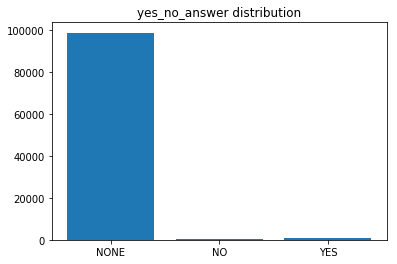

In [8]:
################
# yew no answers
################
answer_yes_no = train.annotations.apply(lambda x: x[0]['yes_no_answer'])
yes_no_answer_counts = Counter(answer_yes_no)
print('DISTRIBUTION OF yes_no_answer : ', yes_no_answer_counts)

percent_yes_no = 1 - yes_no_answer_counts['NONE'] / sum(yes_no_answer_counts.values())
print('PERCENTAGE : ', percent_yes_no, "of the questions have yes/no answers given")

ks = [k for k in yes_no_answer_counts.keys()]
vs = [yes_no_answer_counts[k] for k in ks]

plt.bar(ks, vs)
plt.title('yes_no_answer distribution')
plt.show()

DISTRIBUTION OF short_answers :  Counter({0: 65232, 1: 31331, 2: 1829, 3: 678, 4: 341, 5: 201, 6: 118, 7: 97, 8: 66, 10: 59, 9: 40, 11: 3, 12: 2, 21: 1, 13: 1, 17: 1})
PERCENTAGE :  0.34768 of the questions have at least one short answer


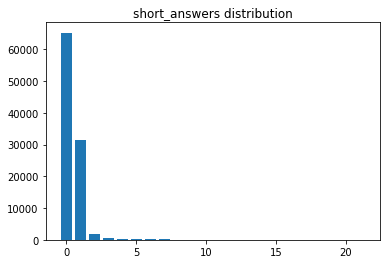

In [9]:
################
# short answers
################
answer_short = train.annotations.apply(lambda x: [(y['start_token'], y['end_token']) for y in x[0]['short_answers']])
num_short_answers = answer_short.apply(lambda x: len(x))
short_answer_counts = Counter(num_short_answers)
print('DISTRIBUTION OF short_answers : ', short_answer_counts)

percent_short = 1 - short_answer_counts[0] / sum(short_answer_counts.values())
print('PERCENTAGE : ', percent_short, "of the questions have at least one short answer")

ks = [k for k in short_answer_counts.keys()]
ks.sort()
vs = [short_answer_counts[k] for k in ks]

plt.bar(ks, vs)
plt.title('short_answers distribution')
plt.show()

DISTRIBUTION OF long_answer :  Counter({0: 50564, 1: 49436})
PERCENTAGE :  0.49436 of the questions have at least one long answer


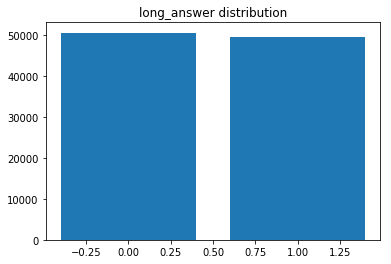

In [10]:
################
# long answers
################
answer_long = train.annotations.apply(lambda x: (x[0]['long_answer']['start_token'], x[0]['long_answer']['end_token']))
answer_long_cleaned = answer_long.apply(lambda x: x if x != (-1, -1) else None)
num_long_answers = answer_long_cleaned.apply(lambda x: 1 if x else 0)
long_answer_counts = Counter(num_long_answers)
print('DISTRIBUTION OF long_answer : ', long_answer_counts)

percent_long = 1 - long_answer_counts[0] / sum(long_answer_counts.values())
print ('PERCENTAGE : ', percent_long, "of the questions have at least one long answer")

ks = [k for k in long_answer_counts.keys()]
ks.sort()
vs = [long_answer_counts[k] for k in ks]

plt.bar(ks, vs)
plt.title('long_answer distribution')
plt.show()

# 3. Summary

In [11]:
################
# summary
################
answer_summary = train['example_id'].to_frame()
answer_summary['annotation_id'] = train.annotations.apply(lambda x: x[0]['annotation_id'])
answer_yes_no_cleaned = answer_yes_no.apply(lambda x: None if x == 'NONE' else x)
answer_summary['has_yes_no'] = answer_yes_no_cleaned.apply(lambda x: x is not None)
answer_summary['yes_no'] = answer_yes_no_cleaned
answer_summary['has_short_answers'] = num_short_answers.apply(lambda x: x>0)
answer_summary['num_short_answers'] = num_short_answers
answer_summary['answer_short'] = answer_short.apply(lambda x: x if len(x) > 0 else None)
answer_summary['has_long_answer'] = num_long_answers.apply(lambda x: x>0)
answer_summary['num_long_answers'] = num_long_answers
answer_summary['answer_long'] = answer_long_cleaned
candidate_indices = train.annotations.apply(lambda x: (x[0]['long_answer']['candidate_index']))
answer_summary['long_candidate_index'] = candidate_indices
summary = answer_summary.apply(lambda row: 
                               True if (row['has_yes_no'] or row['has_short_answers'] or row['has_long_answer'])
                               else False, axis=1)
answer_summary["summary"] = summary

In [12]:
################
# visualizes has_xx_answers' count distributions
################
answer_summary.groupby(['has_yes_no', 'has_short_answers', 'has_long_answer']).size().reset_index().rename(columns={0:'Count'})

has_yes_no  has_short_answers  has_long_answer  Count
0       False              False            False  50564
1       False              False             True  13453
2       False               True             True  34768
3        True              False             True   1215

 - As we can see, there HAS to be a long answer to have a short answer or a yes-no answer. A short answer is a substring of the long answer.
 - [Quotes](https://www.kaggle.com/c/tensorflow2-question-answering/discussion/117182#latest-676643) about the Metrics for this competition from [yuval reina](https://www.kaggle.com/yuval6967)
> I’m saying:<br>
In the real situation:<br>
There is an answer = Positive<br>
There is no answer = Negative<br>
In the prediction:<br>
Long/Short + indices or Yes, No = Positive<br>
Long/Short + Blank = Negative<br>
And your table become:<br>
(Real | Prediction)<br>
There is an answer | Long/Short + indices or Yes, No (and indices are correct) - True Positive<br>
There is an answer | Long/Short + Blank (or indices are wrong) - False Negative<br>
There is no answer | Long/Short + indices or Yes, No - False Positive<br>
There is no answer | Long/Short + Blank - True Negative<br>

In [13]:
answer_summary.head(10)

example_id         annotation_id  has_yes_no yes_no  \
0  5655493461695504401    593165450220027640       False   None   
1  5328212470870865242  12034874153783787365       False   None   
2  4435104480114867852  10527123009892725162       False   None   
3  5289242154789678439  14634796365152556576       False   None   
4  5489863933082811018  11038549994888625916       False   None   
5  3411244446249504947  15980424495672300363       False   None   
6 -2500044561429484630  12644762478285625867       False   None   
7  5611750702541347162   8300549666482891844       False   None   
8  4958098854057393062  16629663860218450498       False   None   
9  8796576945844451825   9055562038158888262       False   None   

   has_short_answers  num_short_answers    answer_short  has_long_answer  \
0               True                  1  [(1960, 1969)]             True   
1               True                  1    [(213, 215)]             True   
2              False                  0            None             True   
3               True                  1    [(512, 514)]             True   
4              False                  0            None            False   
5              False                  0            None            False   
6               True                  1      [(83, 85)]             True   
7              False                  0            None            False   
8              False                  0            None             True   
9              False                  0            None            False   

   num_long_answers   answer_long  long_candidate_index  summary  
0                 1  (1952, 2019)                    54     True  
1                 1    (212, 310)                    15     True  
2                 1    (319, 438)                    24     True  
3                 1    (509, 576)                    59     True  
4                 0          None                    -1    False  
5                 0          None                    -1    False  
6                 1     (82, 169)                     7     True  
7                 0          None                    -1    False  
8                 1    (562, 695)                     3     True  
9                 0          None                    -1    False

# 4. Visualization

### 1. example_id : 5489863933082811018<br>
 - QUESTION :  "What happened to the lost settlement of roanoke?"<br>
 - [Link](https://en.wikipedia.org/wiki/Roanoke_Colony) to the Wikipedia Article **'Roanoke Colony'**<br>
 - Annotations<br>
 [{'yes_no_answer': 'NONE',<br>
  'long_answer': {'start_token': -1, 'candidate_index': -1, 'end_token': -1},<br>
  'short_answers': [],<br>
  'annotation_id': 11038549994888625916}]<br>

| has_yes_no | has_short_answers | has_long_answer |
| ---------- | ----------------- | --------------- |
| False      | False             | False           |

<img src="../images/5489863933082811018.png" alt="5489863933082811018" title="5489863933082811018" />

### 2. example_id : 4435104480114867852<br>
 - QUESTION :  "What type of fertilisation takes place in humans?"<br>
 - [Link](https://en.wikipedia.org//w/index.php?title=Human_fertilization&amp;oldid=831042507) to Article **'Human fertilization'**<br>
 - Annotations<br>
 [{'yes_no_answer': 'NONE',<br>
  'long_answer': {'start_token': 319, 'candidate_index': 24, 'end_token': 438},<br>
  'short_answers': [],<br>
  'annotation_id': 10527123009892725162}]<br>

| has_yes_no | has_short_answers | has_long_answer |
| ---------- | ----------------- | --------------- |
| False      | False             | True            |

<img src="../images/4435104480114867852.png" alt="4435104480114867852" title="4435104480114867852" />

### 3. example_id : 5289242154789678439<br>
 - QUESTION :  "Who had the most wins in the nfl?"<br>
 - [Link](https://en.wikipedia.org//w/index.php?title=List_of_National_Football_League_career_quarterback_wins_leaders&amp;oldid=818143757) to Article **'List of National Football League career quarterback wins leaders'**<br>
 - Annotations<br>
 [{'yes_no_answer': 'NONE',<br>
  'long_answer': {'start_token': 509, 'candidate_index': 59, 'end_token': 576},<br>
  'short_answers': [{'start_token': 512, 'end_token': 514}],<br>
  'annotation_id': 14634796365152556576}]<br>

| has_yes_no | has_short_answers | has_long_answer |
| ---------- | ----------------- | --------------- |
| False      | True              | True            |

<img src="../images/5289242154789678439.png" alt="5289242154789678439" title="5289242154789678439" />

### 4. example_id : 3817861884803470204<br>
 - QUESTION :  "Is hong kong a part of the commonwealth?"<br>
 - [Link](https://en.wikipedia.org//w/index.php?title=Commonwealth_of_Nations&amp;oldid=814669361) to Article **'Commonwealth of Nations'**<br>
 - Annotations<br>
 [{'yes_no_answer': 'NO',<br>
  'long_answer': {'start_token': 6539,<br>
   'candidate_index': 77,<br>
   'end_token': 6646},<br>
  'short_answers': [],<br>
  'annotation_id': 13761098100656608312}]<br>

| has_yes_no | has_short_answers | has_long_answer |
| ---------- | ----------------- | --------------- |
| True       | False             | True            |

<img src="../images/3817861884803470204.png" alt="3817861884803470204" title="3817861884803470204" />